# A deep dive into using Sfaira pretrained models for automated data analysis

This tutorial will take a deeper look into using pretrained Sfaira models for automated data analysis. Sfaira provides an API UserInterface to get and run pretrained models.
We will start of with a simple automatic embedding and cell type annotation. Afterwards we introduce how to use models from local model repositories and finally how to upload new models to Zenodo to share them with other users.

In [1]:
import scanpy as sc
import sfaira

sc.logging.print_version_and_date()
sc.settings.verbosity = 0
sc.set_figure_params()

Ontology <class 'sfaira.versions.metadata.base.OntologyMondo'> is not a DAG, treat child-parent reasoning with care.
Ontology <class 'sfaira.versions.metadata.base.OntologyUberon'> is not a DAG, treat child-parent reasoning with care.
Running Scanpy 1.7.2, on 2021-05-28 15:44.


# Use sfaira pretrained models for automated data analysis

First we instantiate the sfaira user interface

In [2]:
ui = sfaira.ui.UserInterface(sfaira_repo=True)

Next, we need to set which celltype model and which embedding model from the sfaira model zoo we want to apply to our data. As we are analysing human pbmc data, we choose the species 'human' and the organ 'blood', we furthermore specify, that we want to use an autoencoder model (architecture version 0.1) for the embedding and a multilayer perceptron model (architecture version 0.0.1) from the theislab model repository.


In [3]:
ui.zoo_embedding.available_model_ids

['embedding_human-adiposetissue-ae-0.3-0.1_theislab',
 'embedding_human-adiposetissue-linear-0.2-0.1_theislab',
 'embedding_human-adiposetissue-nmf-0.2-0.1_theislab',
 'embedding_human-adiposetissue-vae-0.1-0.1_theislab',
 'embedding_human-adrenalgland-ae-0.1-0.1_theislab',
 'embedding_human-adrenalgland-linear-0.2-0.1_theislab',
 'embedding_human-adrenalgland-nmf-0.2-0.1_theislab',
 'embedding_human-adrenalgland-vae-0.1-0.1_theislab',
 'embedding_human-artery-ae-0.1-0.1_theislab',
 'embedding_human-artery-linear-0.1-0.1_theislab',
 'embedding_human-artery-nmf-0.2-0.1_theislab',
 'embedding_human-artery-vae-0.2-0.1_theislab',
 'embedding_human-blood-ae-0.2-0.1_theislab',
 'embedding_human-blood-linear-0.2-0.1_theislab',
 'embedding_human-blood-nmf-0.2-0.1_theislab',
 'embedding_human-blood-vae-0.1-0.1_theislab',
 'embedding_human-bonemarrow-ae-0.1-0.1_theislab',
 'embedding_human-bonemarrow-linear-0.2-0.1_theislab',
 'embedding_human-bonemarrow-nmf-0.2-0.1_theislab',
 'embedding_human-

In [7]:
ui.zoo_embedding.model_id = 'embedding_human-blood-ae-0.2-0.1_theislab'

In [8]:
ui.zoo_celltype.available_model_ids

['celltype_human-adiposetissue-marker-0.0.1-0.1_theislab',
 'celltype_human-adiposetissue-mlp-0.0.1-0.1_theislab',
 'celltype_human-adiposetissue-mlp-0.1.1-0.1_theislab',
 'celltype_human-adrenalgland-marker-0.0.1-0.1_theislab',
 'celltype_human-adrenalgland-mlp-0.0.1-0.1_theislab',
 'celltype_human-adrenalgland-mlp-0.1.2-0.1_theislab',
 'celltype_human-artery-marker-0.0.1-0.1_theislab',
 'celltype_human-artery-mlp-0.0.1-0.1_theislab',
 'celltype_human-artery-mlp-0.1.1-0.1_theislab',
 'celltype_human-blood-marker-0.0.1-0.1_theislab',
 'celltype_human-blood-mlp-0.0.1-0.1_theislab',
 'celltype_human-blood-mlp-0.1.3-0.1_theislab',
 'celltype_human-bonemarrow-marker-0.0.1-0.1_theislab',
 'celltype_human-bonemarrow-mlp-0.0.1-0.1_theislab',
 'celltype_human-bonemarrow-mlp-0.1.1-0.1_theislab',
 'celltype_human-brain-marker-0.0.1-0.1_theislab',
 'celltype_human-brain-mlp-0.0.1-0.1_theislab',
 'celltype_human-brain-mlp-0.1.3-0.1_theislab',
 'celltype_human-chorionicvillus-marker-0.0.1-0.1_theis

In [10]:
ui.zoo_celltype.model_id = 'celltype_human-blood-mlp-0.1.3-0.1_theislab'

Next, we load the dataset from the scanpy example datasets and specify that in this anndata object, gene symbol annotation can be found in the index column of AnnData.var and ensembl ID annotation is stored in the var column of the name 'gene_ids'. Your dataset needs to have at least one of these annotations. The second annotation can be specified as None and will be created automatically.


In [11]:
ui.load_data(sc.datasets.pbmc3k(), gene_symbol_col='index', gene_ens_col='gene_ids')  # load your dataset into sfaira

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


We now load the specified models and run our data through them.

In [12]:
ui.load_model_celltype()
ui.load_model_embedding()
ui.predict_all()

passed hyperpar: 
 {'units': [512, 256, 128], 'activation': 'selu', 'use_bias': True, 'l1_coef': 1e-06, 'l2_coef': 1e-06, 'kernel_initializer': 'lecun_normal', 'bias_initializer': 'zeros', 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'dropout_rate': 0.2}
passed hyperpar: 
 {'latent_dim': (256, 128, 64, 128, 256), 'l1_coef': 1e-06, 'l2_coef': 1e-06, 'dropout_rate': 0.2, 'input_dropout': 0.0, 'batchnorm': True, 'activation': 'selu', 'init': 'lecun_normal', 'output_layer': 'nb_shared_disp'}
found 2700 observations
found 2700 observations


At this point we have created an AnnData object with our dataset at `ui.data` and have added an annotation column with our predicted celltypes  to `ui.data.obs['celltypes_sfaira']` and have stored a low dimensional representation of our data at `ui.data.obsm['X_sfaira']`.

Let's visualise the results. Here we compute the knn graph and show the computed UMAP based on the sfaira embedding. The predicted cell-types are used for the coloring.

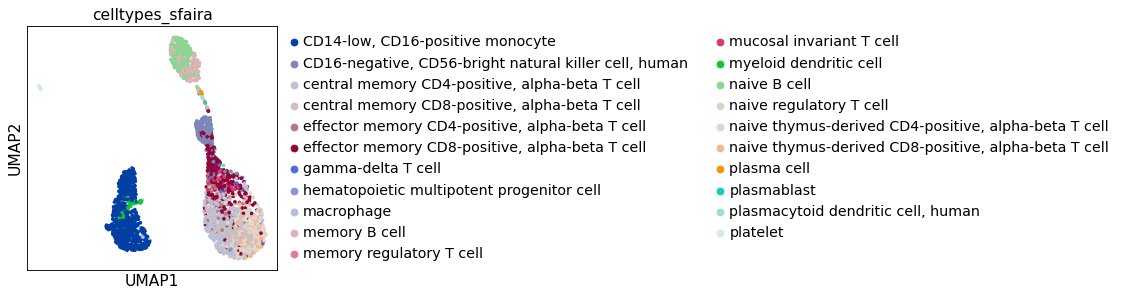

In [13]:
sc.pp.neighbors(ui.data.adata, use_rep="X_sfaira")
sc.tl.umap(ui.data.adata)
sc.pl.umap(ui.data.adata, color="celltypes_sfaira", show=True, save="UMAP_sfaira.png")

# Use your local model repo to run sfaira models

Instead of using the public sfaira model repository, we can also provide a URL to a different public Sfaira model repository or alternatively use our private model repository on our local machine.
A model repository is nothing more than a directory structure which contains TensorFlow weights with a Sfaira model id as filename.

In [10]:
ui = sfaira.ui.UserInterface(custom_repo="/path/to/your/private/weights/repository/", sfaira_repo=False)

In [9]:
# Check that all weights you expect to have loaded are represented in the model_lookuptable
ui.model_lookuptable

,model_id,model_path,model_file_path,md5
0,celltype_human-adiposetissue-marker-0.0.1-0.1_...,/storage/groups/ml01/workspace/leander.dony/pr...,/storage/groups/ml01/workspace/leander.dony/pr...,80a3131e35ea94390a5992217b456aa7
1,celltype_human-adiposetissue-mlp-0.0.1-0.1_the...,/storage/groups/ml01/workspace/leander.dony/pr...,/storage/groups/ml01/workspace/leander.dony/pr...,42d90b5363a94bd3510dcc238de73e8b
2,celltype_human-adiposetissue-mlp-0.1.1-0.1_the...,/storage/groups/ml01/workspace/leander.dony/pr...,/storage/groups/ml01/workspace/leander.dony/pr...,78e6885a1216258b712a02a034a9086c
3,celltype_human-adrenalgland-marker-0.0.1-0.1_t...,/storage/groups/ml01/workspace/leander.dony/pr...,/storage/groups/ml01/workspace/leander.dony/pr...,94a1ac1e063c18abcde5619f437023e2
4,celltype_human-adrenalgland-mlp-0.0.1-0.1_thei...,/storage/groups/ml01/workspace/leander.dony/pr...,/storage/groups/ml01/workspace/leander.dony/pr...,bf51210f672e18f9bcca0712838d507f
...,...,...,...,...
405,embedding_mouse-urinarybladder-vae-0.1-0.1_the...,/storage/groups/ml01/workspace/leander.dony/pr...,/storage/groups/ml01/workspace/leander.dony/pr...,5986b3711d7831a6da7920007df0e111
406,embedding_mouse-uterus-ae-0.1-0.1_theislab,/storage/groups/ml01/workspace/leander.dony/pr...,/storage/groups/ml01/workspace/leander.dony/pr...,2efbaacaa071cc1f32e732e8880ace32
407,embedding_mouse-uterus-linear-0.2-0.1_theislab,/storage/groups/ml01/workspace/leander.dony/pr...,/storage/groups/ml01/workspace/leander.dony/pr...,28e5ada594554ae47c10305f9d5f7dc7
408,embedding_mouse-uterus-nmf-0.1-0.1_theislab,/storage/groups/ml01/workspace/leander.dony/pr...,/storage/groups/ml01/workspace/leander.dony/pr...,764eacdcc3c55cad357b27e423bc3d2c


In [10]:
ui.zoo_embedding.model_id = "embedding_human-blood-ae-0.2-0.1_theislab"
ui.zoo_celltype.model_id = "celltype_human-blood-mlp-0.1.3-0.1_theislab"

In [11]:
ui.load_data(sc.datasets.pbmc3k(), gene_symbol_col='index', gene_ens_col='gene_ids')  # load your dataset into sfaira

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [12]:
ui.load_model_celltype()
ui.load_model_embedding()
ui.predict_all()

sc.pp.neighbors(ui.data.adata, use_rep="X_sfaira")
sc.tl.umap(ui.data.adata)
sc.set_figure_params()

passed hyperpar: 
 {'units': [512, 256, 128], 'activation': 'selu', 'use_bias': True, 'l1_coef': 1e-06, 'l2_coef': 1e-06, 'kernel_initializer': 'lecun_normal', 'bias_initializer': 'zeros', 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'dropout_rate': 0.2}
passed hyperpar: 
 {'latent_dim': (256, 128, 64, 128, 256), 'l1_coef': 1e-06, 'l2_coef': 1e-06, 'dropout_rate': 0.2, 'input_dropout': 0.0, 'batchnorm': True, 'activation': 'selu', 'init': 'lecun_normal', 'output_layer': 'nb_shared_disp'}
found 2700 observations
found 2700 observations


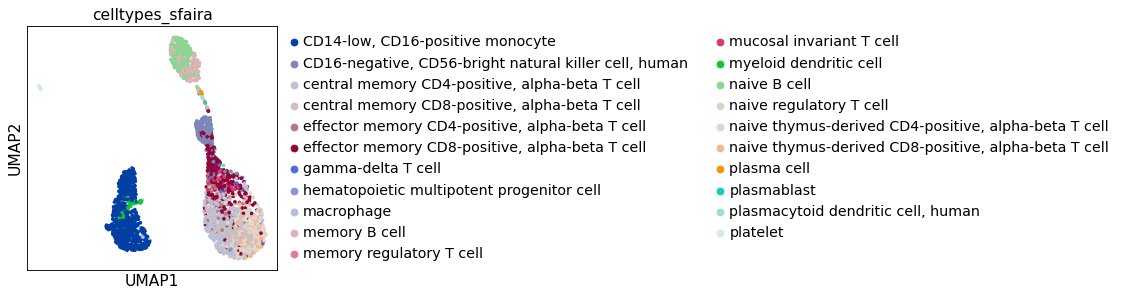

In [13]:
sc.pl.umap(ui.data.adata, color="celltypes_sfaira")

# Upload your private models to Zenodo to make them available for other users

As before, we instantiate the sfaira user interface, pointing to your local model weights repository, which you would like to publish. Then we check the content of the model lookup table. All weights files in the table will be deposited on zenodo in the next step


In [ ]:
ui = sfaira.ui.UserInterface(custom_repo="/path/to/your/private/weights/repository/", sfaira_repo=False)
ui.model_lookuptable

Specify all important information required for publishing you models. A zenodo access token can be obtained from: https://zenodo.org/account/settings/applications/tokens/new/

In [ ]:
zenodo_access_token = "xxx"

# Edit the deposit meta-data below
title = "XXX-Lab sfaira Model Repository"
description = "This is a third-party model weights repository provided by the XXX-Lab for the <a href='https://github.com/theislab/sfaira'>sfaira</a> python package. sfaira is a data and model zoo for single-cell RNA-seq data developed in the group of Prof. Fabian Theis at Helmholtz Munich."
authors = [
    {
        'name': 'LastName, Firstname',
        'affiliation': 'Institute1, Institute2',
#        'orcid': ''
    },
    {
        'name': 'LastName, FirstName',
        'affiliation': 'Institute2, Institute3',
#        'orcid': ''
    },
]

# More custom metadata annotations. Accepted keys can be found here: https://developers.zenodo.org/#representation
metadata = {
#    'version' = '0.1',
#    'keywords' = []
}

We are now ready to publish our weights on Zenodo. This will return the DOI pointing to your Zenodo deposition once it's done. You can set sandbox=True, should you wish to do a test deposition on the zenodo sandbox at https://sandbox.zenodo.org. Furthermore, you can set publish=False to create a draft deposition that you can later edit through the Zenodo web interface prior to publishing it.


In [ ]:
ui.deposit_zenodo(zenodo_access_token=zenodo_access_token, title=title, authors=authors, description=description, metadata=metadata, update_existing_deposition=False, publish=True, sandbox=False, deposit_topologies=True)